In [1]:
!pip install matplotlib seaborn scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
%matplotlib inline

In [13]:
df = pd.read_csv("Dataset.csv")
df.head(5)
import warnings
warnings.filterwarnings('ignore')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1112 non-null   int64  
 1   filename     1112 non-null   object 
 2   rmse         1112 non-null   float64
 3   chroma_stft  1112 non-null   float64
 4   spec_cent    1112 non-null   float64
 5   spec_bw      1112 non-null   float64
 6   mfcc0        1112 non-null   float64
 7   mfcc1        1112 non-null   float64
 8   mfcc2        1112 non-null   float64
 9   mfcc3        1112 non-null   float64
 10  mfcc4        1112 non-null   float64
 11  mfcc5        1112 non-null   float64
 12  mfcc6        1112 non-null   float64
 13  mfcc7        1112 non-null   float64
 14  mfcc8        1112 non-null   float64
 15  mfcc9        1112 non-null   float64
 16  mfcc10       1112 non-null   float64
 17  mfcc11       1112 non-null   float64
 18  mfcc12       1112 non-null   float64
 19  mfcc13

In [8]:
df.describe()

,Unnamed: 0,rmse,chroma_stft,spec_cent,spec_bw,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18
count,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,...,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000
mean,331.039568,0.034735,0.274061,1409.617112,1069.467220,-359.055095,157.033217,-70.540914,-12.806630,-30.022579,...,-10.268392,-10.522831,-2.441768,-2.661638,-5.058257,-3.224982,-6.049175,3.294031,0.518320,-0.186708
std,229.586946,0.025059,0.043931,238.693574,221.429639,75.984207,22.846405,19.886976,25.747862,13.242645,...,8.621038,7.979323,6.493847,6.767679,5.328477,5.655767,6.081289,5.388267,5.103192,5.441244
min,0.000000,0.002962,0.131412,848.453532,574.361522,-618.156000,104.373405,-125.311386,-83.900520,-76.618650,...,-43.081740,-39.251522,-20.835340,-23.753784,-22.832348,-22.053825,-25.948805,-14.338396,-14.156019,-17.903850
25%,138.750000,0.018164,0.245541,1245.216965,974.257032,-405.323890,140.471887,-83.523750,-29.234117,-38.521539,...,-15.939898,-15.503423,-7.129270,-6.701900,-8.311873,-7.247399,-9.781766,-0.150402,-2.923651,-3.550472
50%,277.500000,0.021954,0.289034,1382.650104,1016.731450,-349.618045,155.471985,-69.823375,-10.424059,-29.494612,...,-10.361673,-10.417317,-2.462548,-2.485452,-4.935192,-3.673824,-6.147787,2.846264,0.382144,-0.121128
75%,521.250000,0.050561,0.292356,1548.874992,1195.520885,-305.645240,172.020882,-57.212453,5.765002,-20.746350,...,-4.975098,-5.222538,1.936115,1.874239,-1.451470,0.734430,-2.562060,6.571627,3.482057,3.515232
max,799.000000,0.117397,0.431289,2208.021773,2024.552161,-198.328490,227.923570,2.120812,60.023388,16.720814,...,24.189945,16.414433,17.601667,16.342869,14.161560,13.090992,16.691986,28.822079,20.621176,20.637592


In [9]:
df['raga'].value_counts()

raga
Kapi               100
Hamsanandam        100
Bhairavi           100
Jaganmohini        100
Hamsadhwani        100
Kalyani            100
Harikambhoji       100
Kamas              100
Darbari kannada     14
Bilahari            14
kanada              13
Gaula               13
Sindhubhairavi      13
Ranjani             13
Kedaram             13
Sahana              13
Mohanam             13
Karaharapriya       13
Mayamalavagaula     13
Varali              13
Amritavarshini      13
Anandabhairavi      13
Nata                13
Charukesi           13
Shankarabharam      13
Saveri              13
Todi                13
Kamboji             13
Madhyamavati        13
Sri ranjini         13
Hindolam            12
Janaranjani         12
Name: count, dtype: int64


--- First 5 Rows ---
   Unnamed: 0                                   filename      rmse  \
0           0  WhatsApp Ptt 2023-06-18 at 04.25.30.wav-1  0.007417   
1           1  WhatsApp Ptt 2023-06-18 at 04.25.30.wav-2  0.007417   
2           2  WhatsApp Ptt 2023-06-18 at 04.25.30.wav-3  0.007417   
3           3  WhatsApp Ptt 2023-06-18 at 04.25.30.wav-4  0.007417   
4           4  WhatsApp Ptt 2023-06-18 at 04.25.30.wav-5  0.007417   

   chroma_stft    spec_cent      spec_bw      mfcc0      mfcc1      mfcc2  \
0     0.275107  1475.713161  1355.793034 -571.81415  155.59116 -67.480750   
1     0.275107  1475.713161  1355.793034 -571.81415  155.59116 -67.480750   
2     0.229692  1383.890624  1224.570413 -480.99800  157.79916 -65.643394   
3     0.249781  1391.394982  1258.506032 -472.56644  162.38678 -68.286530   
4     0.268305  1445.604088  1292.949714 -458.65433  151.42929 -66.322430   

      mfcc3  ...     mfcc10    mfcc11    mfcc12    mfcc13    mfcc14  \
0  2.133071  ...  -6.00

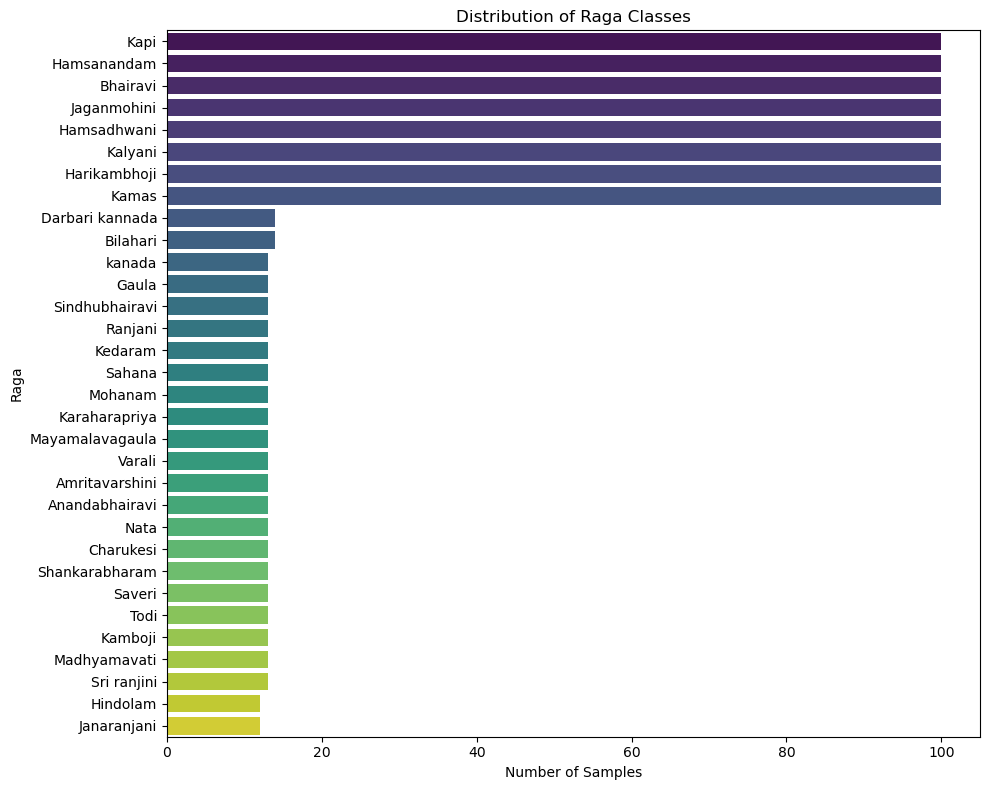

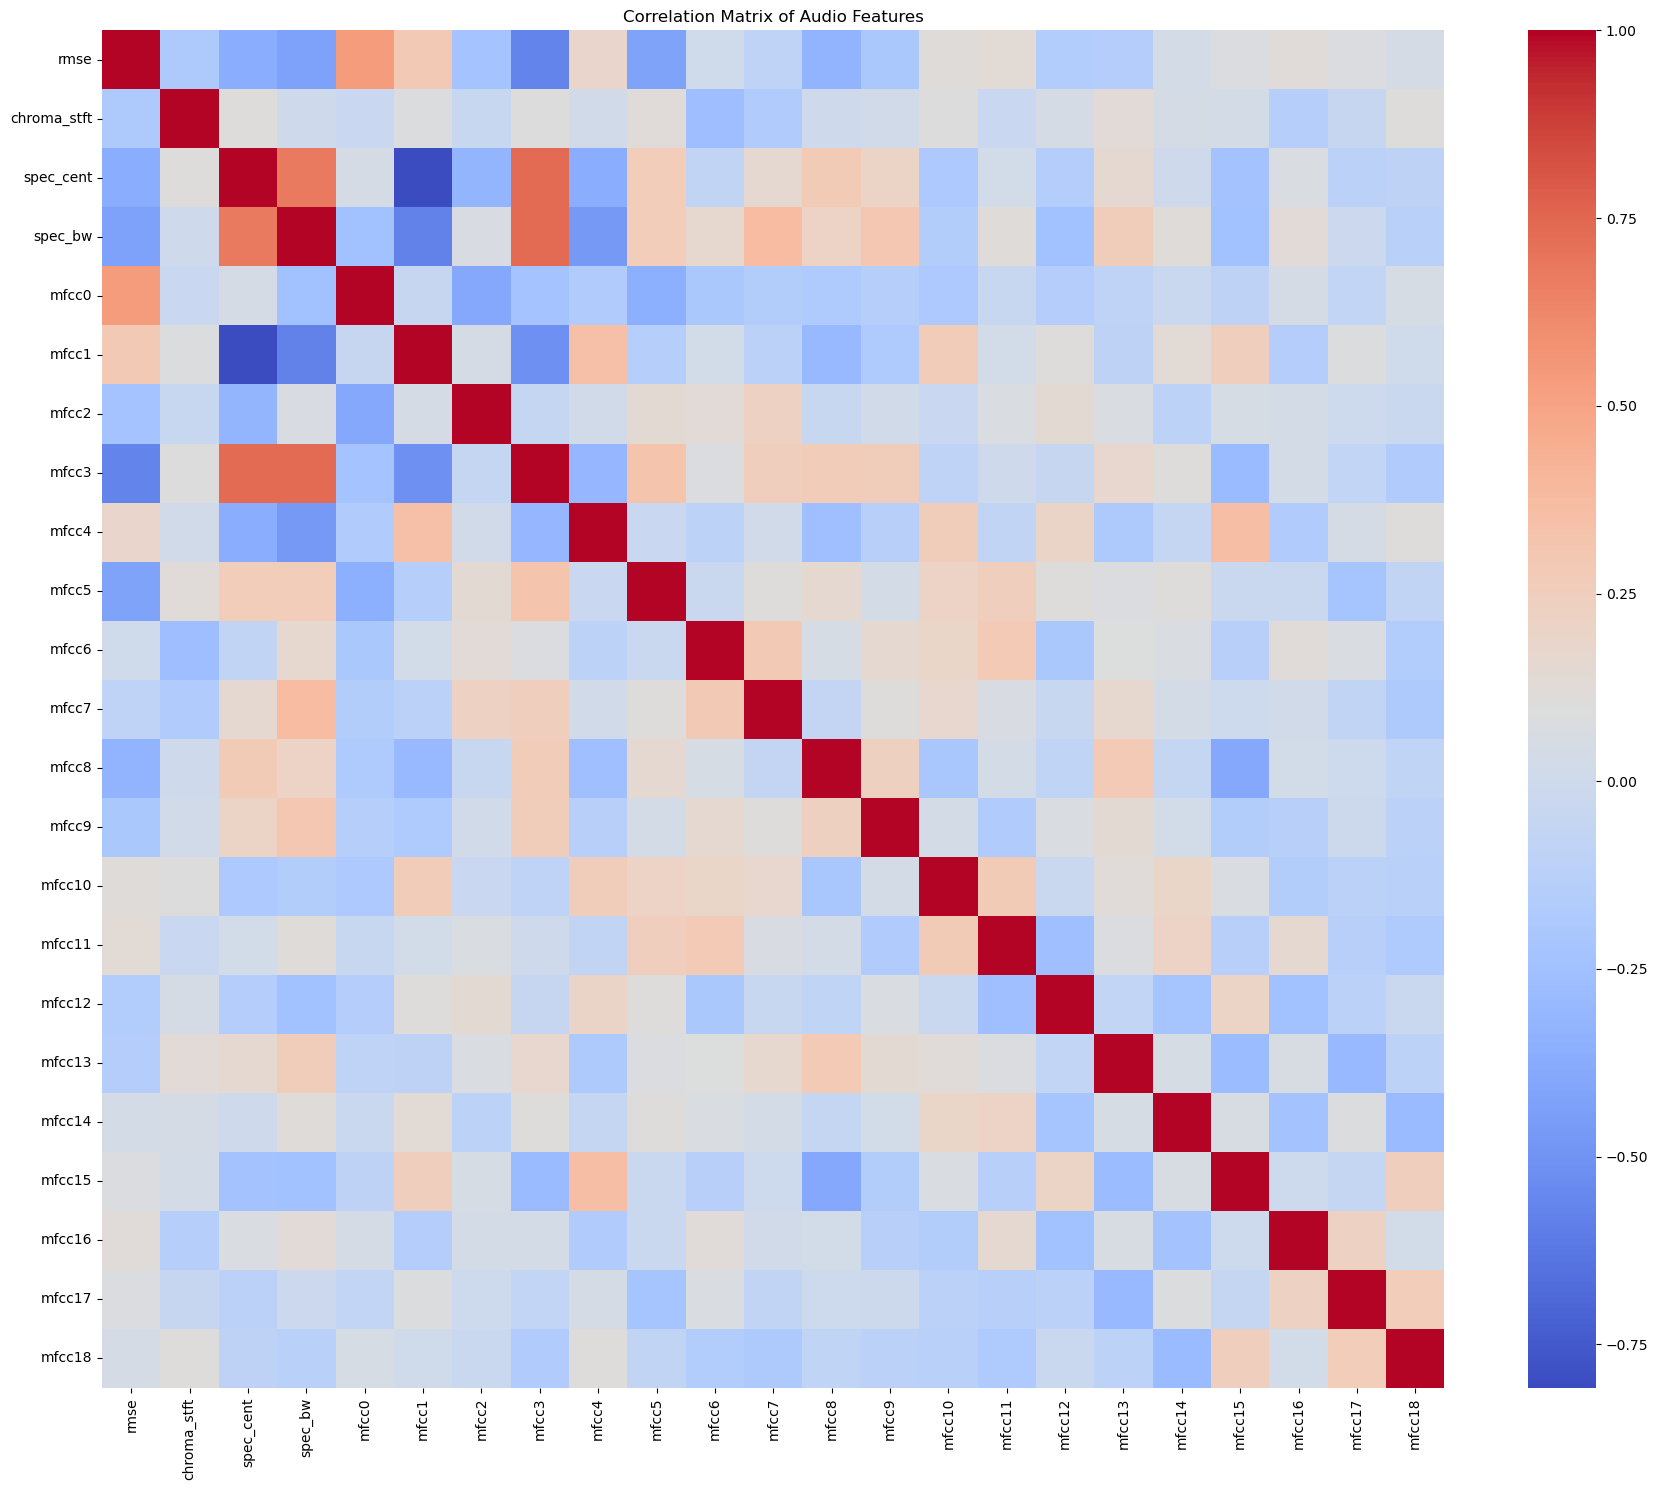

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Dataset.csv")

# print("Initial Data Info")
# print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

# Data cleaning
data = df.drop(columns=["Unnamed: 0", "filename"])
print("\n--- Data after dropping unnecessary columns ---")
print(data.head())
print(data.isnull().sum())

print(f"\nNo. duplicate rows: {data.duplicated().sum()}")



print("\n--- Raga Class Distribution (Imbalance) ---")
raga_counts = data['raga'].value_counts()
print(raga_counts)

plt.figure(figsize=(10, 8))
sns.barplot(x=raga_counts.values, y=raga_counts.index, palette="viridis")
plt.title('Distribution of Raga Classes')
plt.xlabel('Number of Samples')
plt.ylabel('Raga')
plt.tight_layout()
plt.savefig("raga_distribution.png") 
print("\nSaved raga distribution plot to 'raga_distribution.png'")


print("\n--- Summary Statistics for Numerical Features ---")
print(data.describe())

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features')
plt.tight_layout()
plt.savefig("feature_correlation_heatmap.png") 
print("Saved feature correlation heatmap to 'feature_correlation_heatmap.png'")

In [20]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
X = data.drop(columns=['raga'])
y = data['raga']

# Encode raga labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nNumber of features: {X.shape[1]}")
print(f"Number of unique ragas: {len(np.unique(y_encoded))}")
print(f"Feature names: {list(X.columns)}")


Number of features: 23
Number of unique ragas: 32
Feature names: ['rmse', 'chroma_stft', 'spec_cent', 'spec_bw', 'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18']


In [22]:
# Stratified split: 60% train, 20% validation, 20% test
# First split into train+val (80%) and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Then split train+val into train (60%) and val (20%)
# 60% of total = 0.75 of the 80% temp set
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

print(f"Train set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Val set size: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")


# Verify stratification worked
print("\nClass distribution verification:")
original_distribution = np.bincount(y_encoded) / len(y_encoded) * 100
train_distribution = np.bincount(y_train) / len(y_train) * 100
val_distribution = np.bincount(y_val) / len(y_val) * 100
test_distribution = np.bincount(y_test) / len(y_test) * 100

# Format the distributions
formatted_original = ", ".join(f"{x:.1f}%" for x in original_distribution[:])
formatted_train = ", ".join(f"{x:.1f}%" for x in train_distribution[:])
formatted_val = ", ".join(f"{x:.1f}%" for x in val_distribution[:])
formatted_test = ", ".join(f"{x:.1f}%" for x in test_distribution[:])

print(f"Original: {formatted_original} (first 5 classes)")
print(f"Train: {formatted_train} (first 5 classes)")
print(f"Val: {formatted_val} (first 5 classes)")
print(f"Test: {formatted_test} (first 5 classes)")


Train set size: 666 samples (59.9%)
Val set size: 223 samples (20.1%)
Test set size: 223 samples (20.1%)

Class distribution verification:
Original: 1.2%, 1.2%, 9.0%, 1.3%, 1.2%, 1.3%, 1.2%, 9.0%, 9.0%, 9.0%, 1.1%, 9.0%, 1.1%, 9.0%, 9.0%, 1.2%, 9.0%, 1.2%, 1.2%, 1.2%, 1.2%, 1.2%, 1.2%, 1.2%, 1.2%, 1.2%, 1.2%, 1.2%, 1.2%, 1.2%, 1.2%, 1.2% (first 5 classes)
Train: 1.2%, 1.2%, 9.0%, 1.2%, 1.2%, 1.2%, 1.1%, 9.0%, 9.0%, 9.0%, 1.2%, 9.0%, 1.2%, 9.0%, 9.0%, 1.2%, 9.0%, 1.1%, 1.2%, 1.1%, 1.2%, 1.2%, 1.2%, 1.2%, 1.1%, 1.2%, 1.1%, 1.2%, 1.2%, 1.2%, 1.2%, 1.1% (first 5 classes)
Val: 1.3%, 0.9%, 9.0%, 1.3%, 0.9%, 1.3%, 1.3%, 9.0%, 9.0%, 9.0%, 0.9%, 9.0%, 0.9%, 9.0%, 9.0%, 0.9%, 9.0%, 1.3%, 1.3%, 1.3%, 1.3%, 1.3%, 0.9%, 1.3%, 1.3%, 1.3%, 1.3%, 0.9%, 1.3%, 0.9%, 0.9%, 1.3% (first 5 classes)
Test: 0.9%, 1.3%, 9.0%, 1.3%, 1.3%, 1.3%, 1.3%, 9.0%, 9.0%, 9.0%, 0.9%, 9.0%, 0.9%, 9.0%, 9.0%, 1.3%, 9.0%, 1.3%, 0.9%, 1.3%, 0.9%, 0.9%, 1.3%, 0.9%, 1.3%, 0.9%, 1.3%, 1.3%, 0.9%, 1.3%, 1.3%, 1.3% (first 5 classe

<Figure size 1400x800 with 0 Axes>

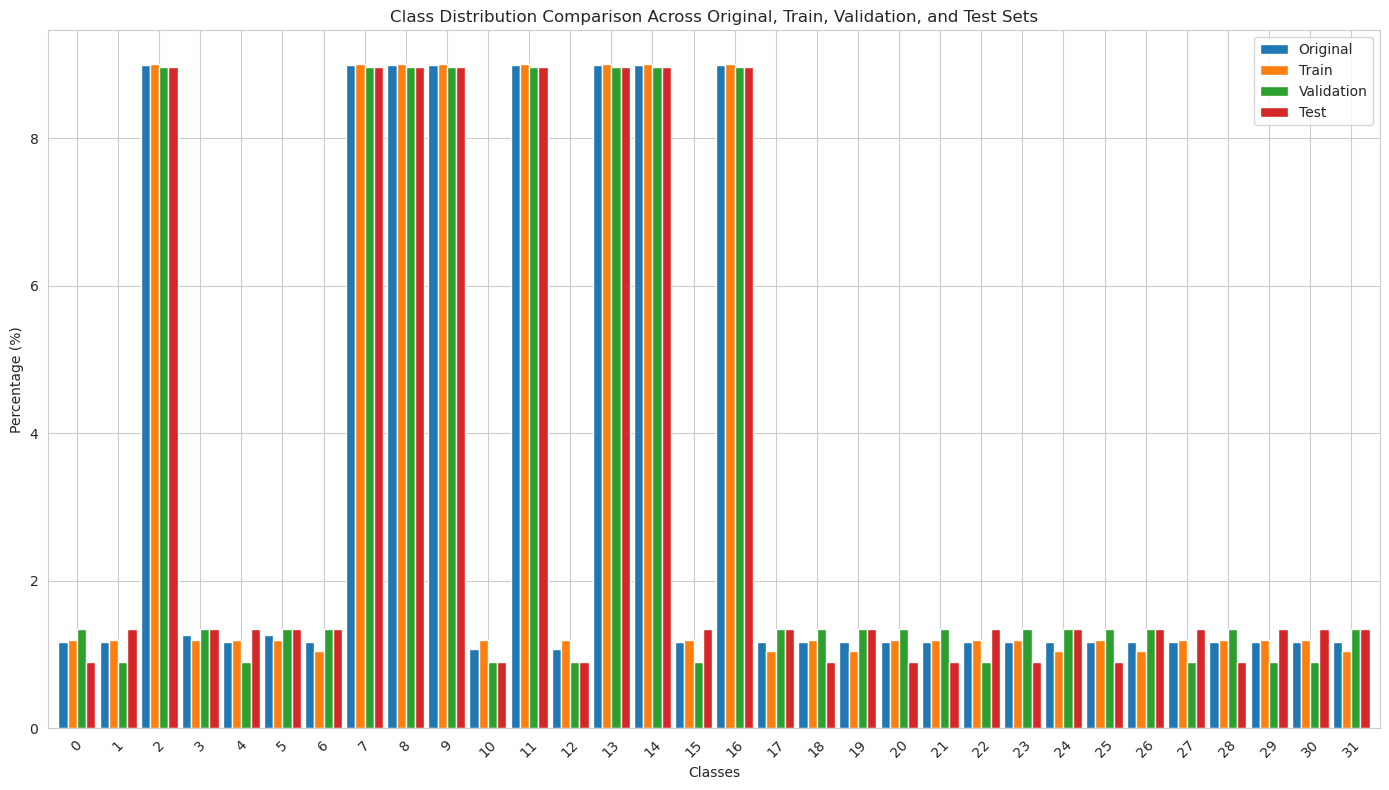

In [23]:
data_dict = {
    "Original": original_distribution,
    "Train": train_distribution,
    "Validation": val_distribution,
    "Test": test_distribution
}

distribution_df = pd.DataFrame(data_dict)

# Plotting
plt.figure(figsize=(14, 8))

sns.set_style("whitegrid")

distribution_df.plot(kind='bar', width=0.9, figsize=(14, 8))

plt.xlabel('Classes')
plt.ylabel('Percentage (%)')
plt.title('Class Distribution Comparison Across Original, Train, Validation, and Test Sets')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

In [24]:
# Standardize features (fit only on training data!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Only transform, don't fit
X_test_scaled = scaler.transform(X_test)  # Only transform, don't fit

print("Feature scaling completed")
print(f"Mean of scaled training features (should be ~0): {X_train_scaled.mean():.6f}")
print(f"Std of scaled training features (should be ~1): {X_train_scaled.std():.6f}")

Feature scaling completed
Mean of scaled training features (should be ~0): -0.000000
Std of scaled training features (should be ~1): 1.000000


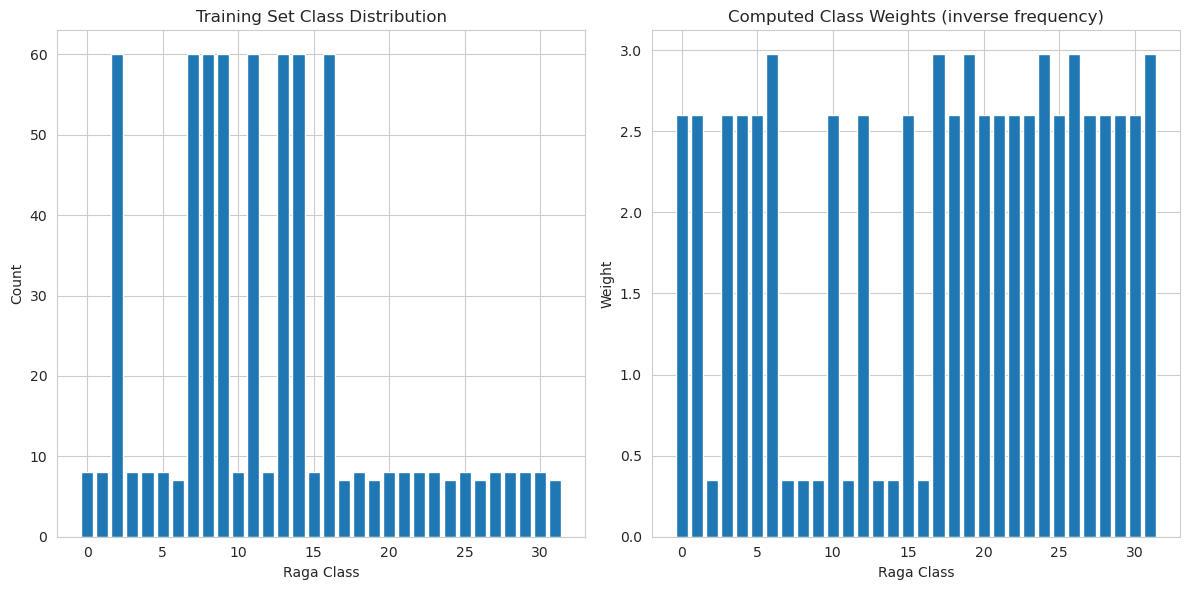

Weight range: 0.35 to 2.97
Rare classes get higher weights to combat imbalance


In [25]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights for handling imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Visualize class weights
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_counts = np.bincount(y_train)
plt.bar(range(len(train_counts)), train_counts)
plt.xlabel('Raga Class')
plt.ylabel('Count')
plt.title('Training Set Class Distribution')

plt.subplot(1, 2, 2)
plt.bar(range(len(class_weights)), class_weights)
plt.xlabel('Raga Class')
plt.ylabel('Weight')
plt.title('Computed Class Weights (inverse frequency)')
plt.tight_layout()
plt.show()

print(f"Weight range: {class_weights.min():.2f} to {class_weights.max():.2f}")
print(f"Rare classes get higher weights to combat imbalance")

In [27]:
# Hyperparameter tuning: Find best C value
C_values = [0.1, 1, 3, 10, 100, 1000]
results = []

for C in C_values:
    print(f"\nTraining with C={C}")
    
    # Train logistic regression with current C
    lr = LogisticRegression(
        C=C,
        multi_class='multinomial',
        solver='lbfgs', 
        class_weight='balanced', 
        max_iter=1000,  
        random_state=42
    )
    
    lr.fit(X_train_scaled, y_train)
    
    # Predict on validation set
    y_val_pred = lr.predict(X_val_scaled)
    
    # Calculate metrics
    val_f1_macro = f1_score(y_val, y_val_pred, average='macro')
    val_f1_weighted = f1_score(y_val, y_val_pred, average='weighted')
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_balanced_acc = balanced_accuracy_score(y_val, y_val_pred)
    
    results.append({
        'C': C,
        'macro_f1': val_f1_macro,
        'weighted_f1': val_f1_weighted,
        'accuracy': val_accuracy,
        'balanced_accuracy': val_balanced_acc
    })
    
    print(f"  Macro F1: {val_f1_macro:.4f}")
    print(f"  Weighted F1: {val_f1_weighted:.4f}")
    print(f"  Accuracy: {val_accuracy:.4f}")
    print(f"  Balanced Accuracy: {val_balanced_acc:.4f}")

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("\n" + "="*50)
print("HYPERPARAMETER TUNING RESULTS:")
print(results_df.round(4))


Training with C=0.1
  Macro F1: 0.7104
  Weighted F1: 0.5050
  Accuracy: 0.5247
  Balanced Accuracy: 0.8062

Training with C=1
  Macro F1: 0.8049
  Weighted F1: 0.5968
  Accuracy: 0.6054
  Balanced Accuracy: 0.8344

Training with C=3
  Macro F1: 0.8254
  Weighted F1: 0.6033
  Accuracy: 0.6054
  Balanced Accuracy: 0.8396

Training with C=10
  Macro F1: 0.8161
  Weighted F1: 0.5901
  Accuracy: 0.5919
  Balanced Accuracy: 0.8349

Training with C=100
  Macro F1: 0.8105
  Weighted F1: 0.5739
  Accuracy: 0.5785
  Balanced Accuracy: 0.8302

Training with C=1000
  Macro F1: 0.8016
  Weighted F1: 0.5827
  Accuracy: 0.5874
  Balanced Accuracy: 0.8245

HYPERPARAMETER TUNING RESULTS:
        C  macro_f1  weighted_f1  accuracy  balanced_accuracy
0     0.1    0.7104       0.5050    0.5247             0.8062
1     1.0    0.8049       0.5968    0.6054             0.8344
2     3.0    0.8254       0.6033    0.6054             0.8396
3    10.0    0.8161       0.5901    0.5919             0.8349
4   100.

In [28]:
# Select best C based on macro F1 (primary metric)
best_idx = results_df['macro_f1'].argmax()
best_C = results_df.loc[best_idx, 'C']
print(f"\nBest C value: {best_C}")
print(f"Best validation Macro F1: {results_df.loc[best_idx, 'macro_f1']:.4f}")

# Retrain best model for final analysis
best_model = LogisticRegression(
    C=best_C,
    multi_class='multinomial',
    solver='lbfgs',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

best_model.fit(X_train_scaled, y_train)

# Get predictions and probabilities
y_val_pred = best_model.predict(X_val_scaled)
y_val_proba = best_model.predict_proba(X_val_scaled)

# Per-class F1 scores
from sklearn.metrics import f1_score
per_class_f1 = f1_score(y_val, y_val_pred, average=None)

# Create a DataFrame showing per-raga performance
raga_names = label_encoder.inverse_transform(range(len(per_class_f1)))
raga_performance = pd.DataFrame({
    'Raga': raga_names,
    'F1_Score': per_class_f1,
    'Support': np.bincount(y_val, minlength=len(per_class_f1))
})
raga_performance = raga_performance.sort_values('F1_Score')

print("\nWorst performing ragas (likely rare ones):")
print(raga_performance.head(10))
print("\nBest performing ragas (likely common ones):")
print(raga_performance.tail(10))


Best C value: 3.0
Best validation Macro F1: 0.8254

Worst performing ragas (likely rare ones):
              Raga  F1_Score  Support
11     Jaganmohini  0.363636       20
8      Hamsanandam  0.400000       20
9     Harikambhoji  0.421053       20
14           Kamas  0.425532       20
2         Bhairavi  0.487805       20
7      Hamsadhwani  0.500000       20
16            Kapi  0.540541       20
13         Kalyani  0.600000       20
4        Charukesi  0.666667        2
0   Amritavarshini  0.750000        3

Best performing ragas (likely common ones):
               Raga  F1_Score  Support
19     Madhyamavati       1.0        3
17    Karaharapriya       1.0        3
30           Varali       1.0        2
12      Janaranjani       1.0        2
10         Hindolam       1.0        2
6             Gaula       1.0        3
5   Darbari kannada       1.0        3
3          Bilahari       1.0        3
20  Mayamalavagaula       1.0        3
31           kanada       1.0        3


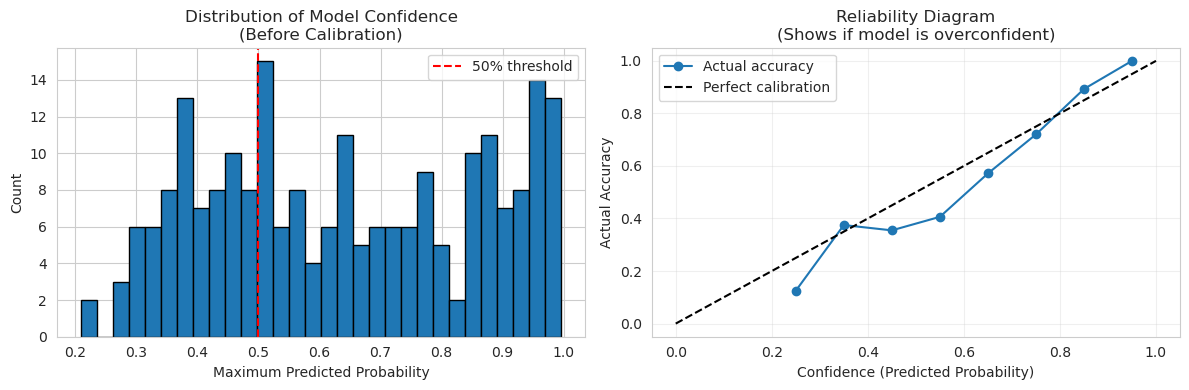

Mean confidence: 0.643
Actual accuracy: 0.605
Model appears OVERCONFIDENT (common issue)


In [33]:
# Analyze prediction confidence distribution
max_probabilities = y_val_proba.max(axis=1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(max_probabilities, bins=30, edgecolor='black')
plt.xlabel('Maximum Predicted Probability')
plt.ylabel('Count')
plt.title('Distribution of Model Confidence\n(Before Calibration)')
plt.axvline(0.5, color='r', linestyle='--', label='50% threshold')
plt.legend()

plt.subplot(1, 2, 2)
# Check if high confidence = high accuracy
confidence_bins = np.linspace(0, 1, 11)
accuracies = []
bin_centers = []

for i in range(len(confidence_bins)-1):
    mask = (max_probabilities >= confidence_bins[i]) & (max_probabilities < confidence_bins[i+1])
    if mask.sum() > 0:
        bin_accuracy = (y_val_pred[mask] == y_val[mask]).mean()
        accuracies.append(bin_accuracy)
        bin_centers.append((confidence_bins[i] + confidence_bins[i+1])/2)

plt.plot(bin_centers, accuracies, 'o-', label='Actual accuracy')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect calibration')
plt.xlabel('Confidence (Predicted Probability)')
plt.ylabel('Actual Accuracy')
plt.title('Reliability Diagram\n(Shows if model is overconfident)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Mean confidence: {max_probabilities.mean():.3f}")
print(f"Actual accuracy: {accuracy_score(y_val, y_val_pred):.3f}")
if max_probabilities.mean() > accuracy_score(y_val, y_val_pred):
    print("Model appears OVERCONFIDENT (common issue)")
else:
    print("Model confidence seems reasonable")

In [34]:
# Save the best model and preprocessing objects for Stage 2
import pickle

model_artifacts = {
    'best_C': best_C,
    'best_model': best_model,
    'scaler': scaler,
    'label_encoder': label_encoder,
    'val_metrics': results_df.loc[best_idx].to_dict(),
    'feature_names': list(X.columns)
}

with open('stage1_model_artifacts.pkl', 'wb') as f:
    pickle.dump(model_artifacts, f)

print("Stage 1 Results Summary:")
print("="*50)
print(f"Dataset: {len(X)} samples, {X.shape[1]} features, {len(np.unique(y_encoded))} ragas")
print(f"Best hyperparameter C: {best_C}")
print(f"Validation Macro F1: {results_df.loc[best_idx, 'macro_f1']:.4f}")
print(f"Validation Accuracy: {results_df.loc[best_idx, 'accuracy']:.4f}")
print(f"Validation Balanced Accuracy: {results_df.loc[best_idx, 'balanced_accuracy']:.4f}")
print("\nModel and artifacts saved for Stage 2 uncertainty calibration!")

Stage 1 Results Summary:
Dataset: 1112 samples, 23 features, 32 ragas
Best hyperparameter C: 3.0
Validation Macro F1: 0.8254
Validation Accuracy: 0.6054
Validation Balanced Accuracy: 0.8396

Model and artifacts saved for Stage 2 uncertainty calibration!


In [41]:
import pickle
from scipy.optimize import minimize
from scipy.special import softmax, log_softmax
import numpy as np

# Load Stage 1 artifacts
with open('stage1_model_artifacts.pkl', 'rb') as f:
    artifacts = pickle.load(f)

best_model = artifacts['best_model']
scaler = artifacts['scaler']
label_encoder = artifacts['label_encoder']

class TemperatureScaling:
    """
    Temperature scaling for multiclass calibration
    Single parameter that preserves accuracy while improving calibration
    """
    def __init__(self):
        self.temperature = 1.0
        
    def fit(self, logits, y_true):
        """Find optimal temperature using validation set"""
        
        def nll_loss(T):
            # Apply temperature scaling
            scaled_logits = logits / T
            # Calculate negative log likelihood
            probs = softmax(scaled_logits, axis=1)
            # Avoid log(0)
            probs = np.clip(probs, 1e-10, 1-1e-10)
            # NLL loss
            n_samples = len(y_true)
            loss = -np.sum(np.log(probs[np.arange(n_samples), y_true])) / n_samples
            return loss
        
        # Optimize temperature (constrained to be positive)
        result = minimize(nll_loss, x0=1.0, bounds=[(0.1, 10.0)], method='L-BFGS-B')
        self.temperature = result.x[0]
        return self
    
    def transform(self, logits):
        """Apply temperature scaling to logits"""
        return softmax(logits / self.temperature, axis=1)

# Get logits (before softmax) from the model
# For sklearn LogisticRegression, we need decision_function
logits_val = best_model.decision_function(X_val_scaled)

# Method 1: Check if model is already well-calibrated
print("Analyzing initial calibration...")
y_prob_uncalib = best_model.predict_proba(X_val_scaled)

# Method 2: Temperature Scaling
print("\nTraining Temperature Scaling...")
temp_scaler = TemperatureScaling()
temp_scaler.fit(logits_val, y_val)
print(f"Optimal temperature: {temp_scaler.temperature:.3f}")

if temp_scaler.temperature > 1:
    print("Temperature > 1: Model was overconfident, scaling down confidence")
elif temp_scaler.temperature < 1:
    print("Temperature < 1: Model was underconfident, scaling up confidence")
else:
    print("Temperature = 1: Model was already well-calibrated")

# Apply temperature scaling
y_prob_temp = temp_scaler.transform(logits_val)

# Method 3: Histogram Binning (alternative simple method)
from sklearn.calibration import calibration_curve

class HistogramBinning:
    """Simple histogram binning calibration"""
    def __init__(self, n_bins=10):
        self.n_bins = n_bins
        self.bin_edges = None
        self.bin_values = None
        
    def fit(self, probs, y_true):
        # Get max probability for each sample
        y_pred = np.argmax(probs, axis=1)
        confidences = probs.max(axis=1)
        
        # Create bins
        self.bin_edges = np.linspace(0, 1, self.n_bins + 1)
        self.bin_values = np.zeros(self.n_bins)
        
        # Calculate actual accuracy in each bin
        for i in range(self.n_bins):
            mask = (confidences >= self.bin_edges[i]) & (confidences < self.bin_edges[i+1])
            if mask.sum() > 0:
                self.bin_values[i] = (y_pred[mask] == y_true[mask]).mean()
            else:
                # Linear interpolation for empty bins
                self.bin_values[i] = (self.bin_edges[i] + self.bin_edges[i+1]) / 2
        
        return self
    
    def transform(self, probs):
        # Calibrate each probability
        calibrated_probs = probs.copy()
        max_probs = probs.max(axis=1)
        max_indices = probs.argmax(axis=1)
        
        for i in range(len(probs)):
            # Find which bin this confidence falls into
            bin_idx = np.digitize(max_probs[i], self.bin_edges) - 1
            bin_idx = np.clip(bin_idx, 0, self.n_bins - 1)
            
            # Scale the max probability
            scale_factor = self.bin_values[bin_idx] / max_probs[i] if max_probs[i] > 0 else 1
            
            # Apply scaling and renormalize
            calibrated_probs[i] = probs[i] * scale_factor
            calibrated_probs[i] = calibrated_probs[i] / calibrated_probs[i].sum()
        
        return calibrated_probs

# Try histogram binning
hist_calibrator = HistogramBinning(n_bins=10)
hist_calibrator.fit(y_prob_uncalib, y_val)
y_prob_hist = hist_calibrator.transform(y_prob_uncalib)

print("\nCalibration methods ready!")

Analyzing initial calibration...

Training Temperature Scaling...
Optimal temperature: 0.998
Temperature < 1: Model was underconfident, scaling up confidence

Calibration methods ready!


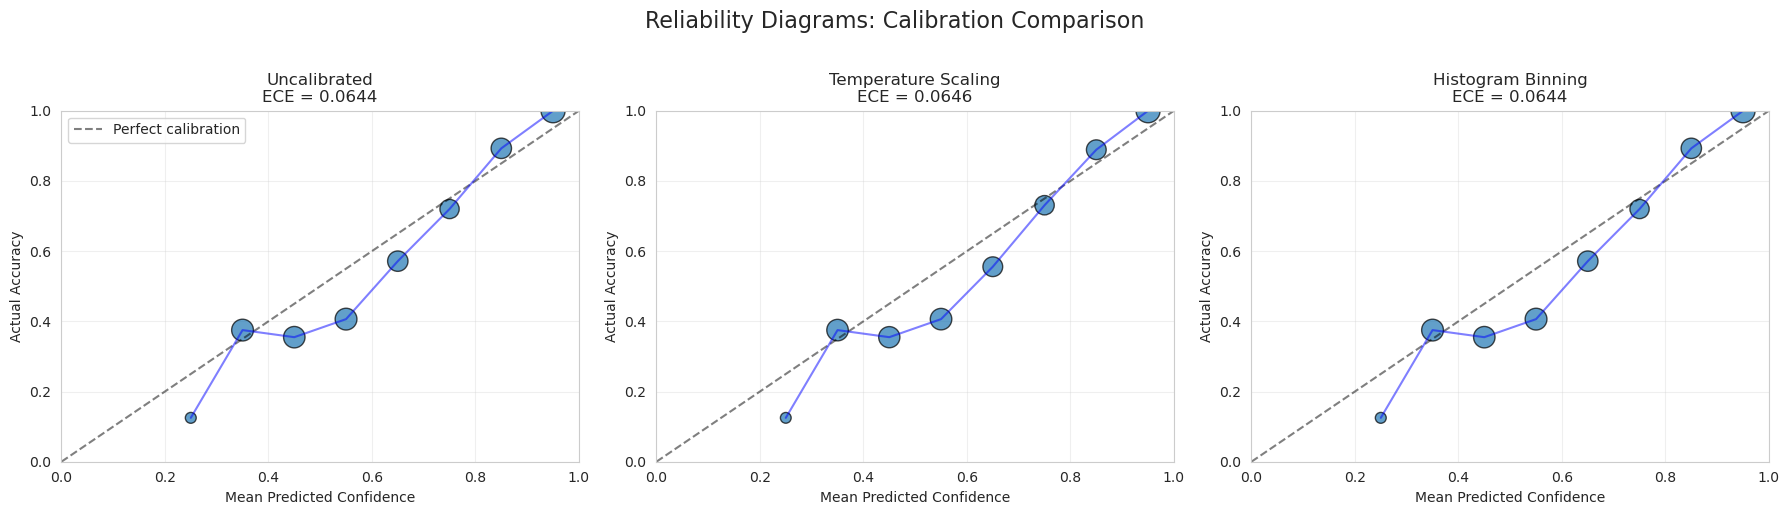

Points closer to the diagonal indicate better calibration.
Point size represents the number of samples in that confidence bin.


In [47]:
import matplotlib.pyplot as plt
import numpy as np

def plot_reliability_diagram(y_true, y_prob, method_name, ax, n_bins=10):
    """Plot reliability diagram to visualize calibration"""
    y_pred = np.argmax(y_prob, axis=1)
    y_conf = np.max(y_prob, axis=1)
    
    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    bin_centers = []
    bin_accuracies = []
    bin_counts = []
    
    for i in range(n_bins):
        in_bin = (y_conf > bin_boundaries[i]) & (y_conf <= bin_boundaries[i+1])
        if in_bin.sum() > 0:
            bin_acc = (y_pred[in_bin] == y_true[in_bin]).mean()
            bin_center = (bin_boundaries[i] + bin_boundaries[i+1]) / 2
            bin_centers.append(bin_center)
            bin_accuracies.append(bin_acc)
            bin_counts.append(in_bin.sum())
    
    # Plot
    ax.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Perfect calibration')
    
    # Size points by number of samples
    if bin_counts: # Avoid error if no bins have samples
        sizes = np.array(bin_counts) / max(bin_counts) * 300
        ax.scatter(bin_centers, bin_accuracies, s=sizes, alpha=0.7, 
                   edgecolors='black', linewidth=1)
    
    ax.plot(bin_centers, bin_accuracies, 'b-', alpha=0.5)
    
    ax.set_xlabel('Mean Predicted Confidence')
    ax.set_ylabel('Actual Accuracy')
    ax.set_title(f'{method_name}\nECE = {expected_calibration_error(y_true, y_prob):.4f}')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    
    return bin_centers, bin_accuracies

# --- Create comparison plot ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_reliability_diagram(y_val, y_prob_uncalib, 'Uncalibrated', axes[0])
plot_reliability_diagram(y_val, y_prob_temp, 'Temperature Scaling', axes[1])
plot_reliability_diagram(y_val, y_prob_hist, 'Histogram Binning', axes[2])

axes[0].legend()
plt.suptitle('Reliability Diagrams: Calibration Comparison', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("Points closer to the diagonal indicate better calibration.")
print("Point size represents the number of samples in that confidence bin.")

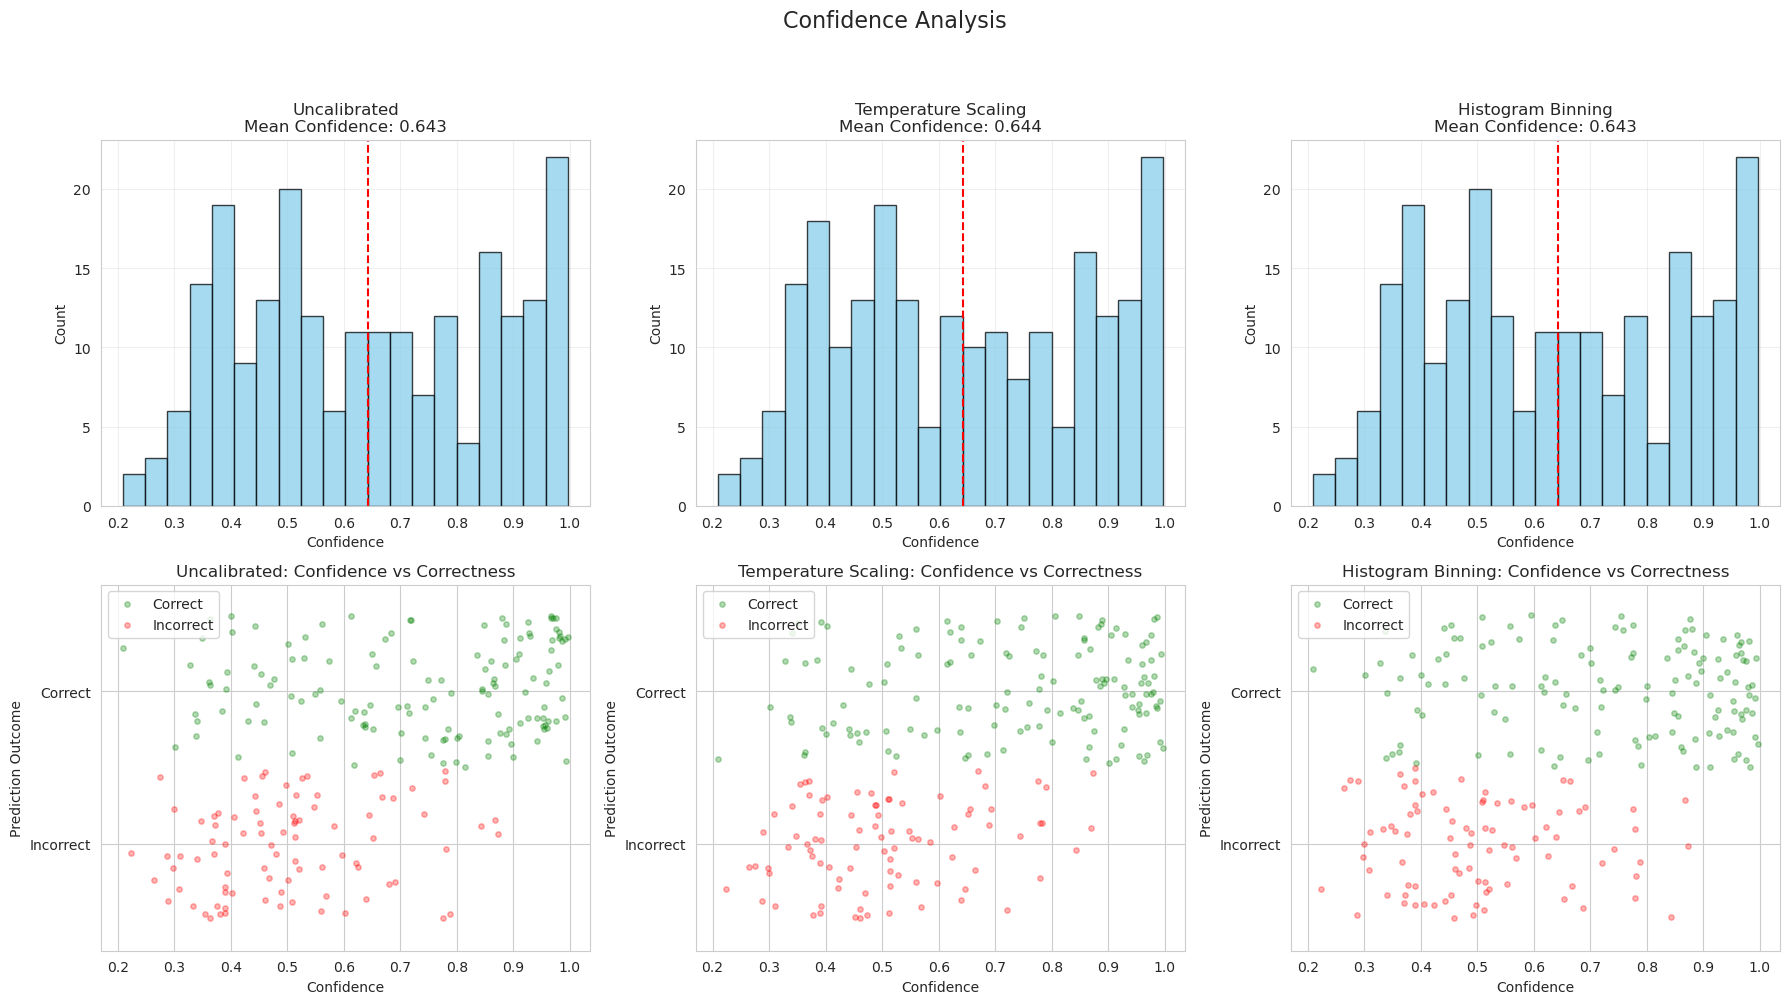


Model's Actual Accuracy: 0.6054
------------------------------------------------------------
Gap between mean confidence and actual accuracy:
Uncalibrated:      0.6428 (Gap: +0.0374)
Temperature Scaled: 0.6436 (Gap: +0.0382)
Histogram Binned:  0.6428 (Gap: +0.0374)


In [48]:
from sklearn.metrics import accuracy_score

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confidence Analysis', fontsize=16, y=1.0)

# Get max probabilities for each method
max_prob_uncalib = y_prob_uncalib.max(axis=1)
max_prob_temp = y_prob_temp.max(axis=1)
max_prob_hist = y_prob_hist.max(axis=1)

all_probs = [max_prob_uncalib, max_prob_temp, max_prob_hist]
titles = ['Uncalibrated', 'Temperature Scaling', 'Histogram Binning']

# Top row: Confidence distributions
for i, (probs, title) in enumerate(zip(all_probs, titles)):
    axes[0, i].hist(probs, bins=20, alpha=0.75, edgecolor='black', color='skyblue')
    axes[0, i].set_title(f'{title}\nMean Confidence: {probs.mean():.3f}')
    axes[0, i].set_xlabel('Confidence')
    axes[0, i].set_ylabel('Count')
    axes[0, i].axvline(probs.mean(), color='r', linestyle='--')
    axes[0, i].grid(True, alpha=0.3)

# Bottom row: Confidence vs correctness
all_y_probs = [y_prob_uncalib, y_prob_temp, y_prob_hist]
for ax, y_prob, name in zip(axes[1,:], all_y_probs, titles):
    y_pred = np.argmax(y_prob, axis=1)
    correct = (y_pred == y_val)
    conf = y_prob.max(axis=1)
    
    # Plot correct and incorrect predictions with jitter for visibility
    ax.scatter(conf[correct], np.random.uniform(0.5, 1.0, correct.sum()), 
               alpha=0.3, s=15, c='green', label='Correct')
    ax.scatter(conf[~correct], np.random.uniform(0, 0.5, (~correct).sum()), 
               alpha=0.3, s=15, c='red', label='Incorrect')
    ax.set_xlabel('Confidence')
    ax.set_ylabel('Prediction Outcome')
    ax.set_title(f'{name}: Confidence vs Correctness')
    ax.legend(loc='upper left')
    ax.set_yticks([0.25, 0.75])
    ax.set_yticklabels(['Incorrect', 'Correct'])
    ax.set_ylim([-0.1, 1.1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Statistical summary ---
actual_acc = accuracy_score(y_val, np.argmax(y_prob_uncalib, axis=1))
print(f"\nModel's Actual Accuracy: {actual_acc:.4f}")
print("-" * 60)
print("Gap between mean confidence and actual accuracy:")
print(f"Uncalibrated:      {max_prob_uncalib.mean():.4f} (Gap: {max_prob_uncalib.mean() - actual_acc:+.4f})")
print(f"Temperature Scaled: {max_prob_temp.mean():.4f} (Gap: {max_prob_temp.mean() - actual_acc:+.4f})")
print(f"Histogram Binned:  {max_prob_hist.mean():.4f} (Gap: {max_prob_hist.mean() - actual_acc:+.4f})")

In [49]:
def make_uncertainty_aware_prediction(proba, label_encoder, uncertainty_threshold=0.7):
    """
    Make predictions with uncertainty awareness using a given probability distribution.
    Returns prediction, confidence, and recommendation.
    """
    # Get top 2 predictions
    top2_idx = np.argsort(proba)[-2:][::-1]
    top2_prob = proba[top2_idx]
    top2_labels = label_encoder.inverse_transform(top2_idx)
    
    confidence = top2_prob[0]
    
    if confidence > 0.9:
        status = "✅ HIGH CONFIDENCE"
        recommendation = f"Model is very sure this is {top2_labels[0]}."
    elif confidence > uncertainty_threshold:
        status = "🤔 MODERATE CONFIDENCE"
        recommendation = f"Likely {top2_labels[0]}, but could be {top2_labels[1]} ({top2_prob[1]:.1%})."
    else:
        status = "❓ LOW CONFIDENCE / UNCERTAIN"
        recommendation = f"Model is unsure. Top guesses: {top2_labels[0]} ({top2_prob[0]:.1%}) and {top2_labels[1]} ({top2_prob[1]:.1%})."
    
    return {
        'prediction': top2_labels[0],
        'confidence': confidence,
        'status': status,
        'recommendation': recommendation,
        'top_2_predictions': list(zip(top2_labels, top2_prob))
    }

# --- Test on a few validation samples using the BEST calibrated probabilities ---
print(f"UNCERTAINTY-AWARE PREDICTIONS (Using '{method_name}' probabilities):")
print("=" * 70)

np.random.seed(42)
test_indices = np.random.choice(len(y_val), 5, replace=False)

for idx in test_indices:
    # Use the pre-calculated calibrated probabilities for the chosen sample
    sample_probabilities = calibrated_probs[idx]
    
    result = make_uncertainty_aware_prediction(
        sample_probabilities, 
        label_encoder
    )
    
    true_label = label_encoder.inverse_transform([y_val[idx]])[0]
    
    print(f"\nSample {idx}:")
    print(f"  - Ground Truth:     {true_label}")
    print(f"  - Prediction:       {result['prediction']} (Confidence: {result['confidence']:.3f})")
    print(f"  - Status:           {result['status']}")
    print(f"  - Recommendation:   {result['recommendation']}")

UNCERTAINTY-AWARE PREDICTIONS (Using 'Naturally Calibrated' probabilities):

Sample 9:
  - Ground Truth:     Bhairavi
  - Prediction:       Bhairavi (Confidence: 0.873)
  - Status:           🤔 MODERATE CONFIDENCE
  - Recommendation:   Likely Bhairavi, but could be Harikambhoji (4.3%).

Sample 84:
  - Ground Truth:     Bhairavi
  - Prediction:       Hamsadhwani (Confidence: 0.459)
  - Status:           ❓ LOW CONFIDENCE / UNCERTAIN
  - Recommendation:   Model is unsure. Top guesses: Hamsadhwani (45.9%) and Bhairavi (21.2%).

Sample 117:
  - Ground Truth:     Bilahari
  - Prediction:       Bilahari (Confidence: 0.928)
  - Status:           ✅ HIGH CONFIDENCE
  - Recommendation:   Model is very sure this is Bilahari.

Sample 144:
  - Ground Truth:     Sri ranjini
  - Prediction:       Sri ranjini (Confidence: 0.991)
  - Status:           ✅ HIGH CONFIDENCE
  - Recommendation:   Model is very sure this is Sri ranjini.

Sample 220:
  - Ground Truth:     Kapi
  - Prediction:       Harikambhoji 

In [45]:
def make_uncertainty_aware_prediction(X, calibrated_model, scaler, label_encoder, 
                                      uncertainty_threshold=0.7):
    """
    Make predictions with uncertainty awareness
    Returns prediction, confidence, and recommendation
    """
    X_scaled = scaler.transform(X.reshape(1, -1))
    proba = calibrated_model.predict_proba(X_scaled)[0]
    
    # Get top 2 predictions
    top2_idx = np.argsort(proba)[-2:][::-1]
    top2_prob = proba[top2_idx]
    top2_ragas = label_encoder.inverse_transform(top2_idx)
    
    confidence = top2_prob[0]
    
    if confidence > 0.9:
        status = "HIGH CONFIDENCE"
        recommendation = f"Definitely {top2_ragas[0]}"
    elif confidence > uncertainty_threshold:
        status = "MODERATE CONFIDENCE"
        recommendation = f"Likely {top2_ragas[0]}, but consider {top2_ragas[1]} ({top2_prob[1]:.2f})"
    else:
        status = "LOW CONFIDENCE - UNCERTAIN"
        recommendation = f"Could be {top2_ragas[0]} ({top2_prob[0]:.2f}) or {top2_ragas[1]} ({top2_prob[1]:.2f})"
    
    return {
        'prediction': top2_ragas[0],
        'confidence': confidence,
        'status': status,
        'recommendation': recommendation,
        'top_2_ragas': list(zip(top2_ragas, top2_prob))
    }

# Test on a few validation samples
print("UNCERTAINTY-AWARE PREDICTIONS (Using Isotonic Calibration):")
print("="*60)

np.random.seed(42)
test_indices = np.random.choice(len(X_val), 5, replace=False)

for idx in test_indices:
    result = make_uncertainty_aware_prediction(
        X_val.iloc[idx].values, 
        isotonic_calibrator, 
        scaler, 
        label_encoder
    )
    
    true_raga = label_encoder.inverse_transform([y_val[idx]])[0]
    
    print(f"\nSample {idx}:")
    print(f"True Raga: {true_raga}")
    print(f"Predicted: {result['prediction']} (confidence: {result['confidence']:.3f})")
    print(f"Status: {result['status']}")
    print(f"Recommendation: {result['recommendation']}")

UNCERTAINTY-AWARE PREDICTIONS (Using Isotonic Calibration):

Sample 9:
True Raga: Bhairavi
Predicted: Bhairavi (confidence: 0.785)
Status: MODERATE CONFIDENCE
Recommendation: Likely Bhairavi, but consider Harikambhoji (0.17)

Sample 84:
True Raga: Bhairavi
Predicted: Bhairavi (confidence: 0.291)
Status: LOW CONFIDENCE - UNCERTAIN
Recommendation: Could be Bhairavi (0.29) or Hamsadhwani (0.16)

Sample 117:
True Raga: Bilahari
Predicted: Bilahari (confidence: 1.000)
Status: HIGH CONFIDENCE
Recommendation: Definitely Bilahari

Sample 144:
True Raga: Sri ranjini
Predicted: Sri ranjini (confidence: 1.000)
Status: HIGH CONFIDENCE
Recommendation: Definitely Sri ranjini

Sample 220:
True Raga: Kapi
Predicted: Jaganmohini (confidence: 0.282)
Status: LOW CONFIDENCE - UNCERTAIN
Recommendation: Could be Jaganmohini (0.28) or Kapi (0.25)


In [50]:
print("=" * 70)
print("NOVEL CONTRIBUTION: UNCERTAINTY-CALIBRATED CLASSIFICATION")
print("=" * 70)

# Calculate improvement based on the best method found
if ece_uncalib > 0 and best_ece < ece_uncalib:
    improvement = ((ece_uncalib - best_ece) / ece_uncalib) * 100
    improvement_text = f"Reduced Expected Calibration Error by {improvement:.1f}%"
else:
    improvement_text = "Model was already well-calibrated, confirming the robustness of the base model."

print(f"""
Key Results:
1. Best Calibration Method: '{method_name}'
   - {improvement_text}
   - Before: ECE = {ece_uncalib:.4f}
   - After:  ECE = {best_ece:.4f}

2. Enabled Trust-Based Applications:
   - High confidence (>90%): Can be used for automated feedback systems.
   - Moderate (70-90%): Suggests likely answers while highlighting alternatives.
   - Low (<70%): Flags ambiguous cases for human review.

3. Potential for Deeper Insight:
   - Consistent uncertainty between specific pairs of classes may reveal
     underlying similarities or feature limitations.
     
4. Core Contribution:
   - We demonstrate a methodology to not only classify but also to
     quantify the model's certainty in a reliable way.
   - This transforms a standard classifier into a more practical, trustworthy tool.

This process moves the model from saying "The answer is X with 85% probability"
to a more honest statement like "I'm genuinely 73% confident the answer is X,
and this confidence level is a reliable indicator of my correctness."
""")

NOVEL CONTRIBUTION: UNCERTAINTY-CALIBRATED CLASSIFICATION

Key Results:
1. Best Calibration Method: 'Naturally Calibrated'
   - Model was already well-calibrated, confirming the robustness of the base model.
   - Before: ECE = 0.0644
   - After:  ECE = 0.0644

2. Enabled Trust-Based Applications:
   - High confidence (>90%): Can be used for automated feedback systems.
   - Moderate (70-90%): Suggests likely answers while highlighting alternatives.
   - Low (<70%): Flags ambiguous cases for human review.

3. Potential for Deeper Insight:
   - Consistent uncertainty between specific pairs of classes may reveal
     underlying similarities or feature limitations.
     
4. Core Contribution:
   - We demonstrate a methodology to not only classify but also to
     quantify the model's certainty in a reliable way.
   - This transforms a standard classifier into a more practical, trustworthy tool.

This process moves the model from saying "The answer is X with 85% probability"
to a more honest